In [1]:
import os
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

In [3]:
y=np.array([1,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1])
y=y.reshape(1,y.shape[0])
classes=np.array(['Male', 'Female'])
y_train=y[:,:80]
y_test=y[:,80:]

In [4]:
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1]) // 2
        crop = img[extra:-extra, :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0]) // 2
        crop = img[:, extra:-extra]
    else:
        crop = img
    return crop

In [5]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    rsz = imresize(square, (64, 64))
    imgs.append(rsz)
print(len(imgs))

100


In [6]:
data = np.array(imgs)
data=data/255
data.shape

(100, 64, 64, 3)

In [7]:
train_x_orig=data[:80,:,:,:]
test_x_orig=data[80:,:,:,:]

In [8]:

m_train = train_x_orig.shape[0]
m_test = y_test.shape[1]
num_px = train_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x_orig.shape))
print ("y_train shape: " + str(y_train.shape))
print ("test_x shape: " + str(test_x_orig.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 80
Number of testing examples: m_test = 20
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_x shape: (80, 64, 64, 3)
y_train shape: (1, 80)
test_x shape: (20, 64, 64, 3)
y_test shape: (1, 20)


In [9]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T
print ("train_x flatten shape: " + str(train_x.shape))
print ("test_x flatten shape: " + str(test_x.shape))

train_x flatten shape: (12288, 80)
test_x flatten shape: (12288, 20)


In [44]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))   
    return s

In [45]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [46]:
def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if male celebrity, 1 if female celebrity) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = (-1/m)*(np.dot(Y,np.log(A.T))+ np.dot((1-Y),np.log((1-A).T)))                                 # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum((A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [47]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [48]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)   
    Y_prediction=np.round(A)

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [49]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    m_train=X_train.shape[0]
    w, b = initialize_with_zeros(m_train)

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations= num_iterations, learning_rate = learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [57]:
d = model(train_x, y_train, test_x, y_test, num_iterations = 1500, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.526937
Cost after iteration 200: 0.446804
Cost after iteration 300: 0.393522
Cost after iteration 400: 0.353347
Cost after iteration 500: 0.321117
Cost after iteration 600: 0.294347
Cost after iteration 700: 0.271622
Cost after iteration 800: 0.252037
Cost after iteration 900: 0.234966
Cost after iteration 1000: 0.219948
Cost after iteration 1100: 0.206637
Cost after iteration 1200: 0.194759
Cost after iteration 1300: 0.184099
Cost after iteration 1400: 0.174482
train accuracy: 100.0 %
test accuracy: 60.0 %


In [103]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])] + " \n Class: " + classes[y[0,index]])

In [58]:
a=d["Y_prediction_test"]+y_test
p=d["Y_prediction_test"]
mislabeled_indices = np.asarray(np.where(a == 1))
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
num_images = len(mislabeled_indices[0])
#print(d["Y_prediction_test"])
#print(y_test)
print(a)
print(mislabeled_indices)

[[ 0.  1.  2.  1.  2.  1.  1.  2.  2.  0.  1.  2.  2.  1.  1.  2.  2.  2.
   2.  1.]]
[[ 0  0  0  0  0  0  0  0]
 [ 1  3  5  6 10 13 14 19]]


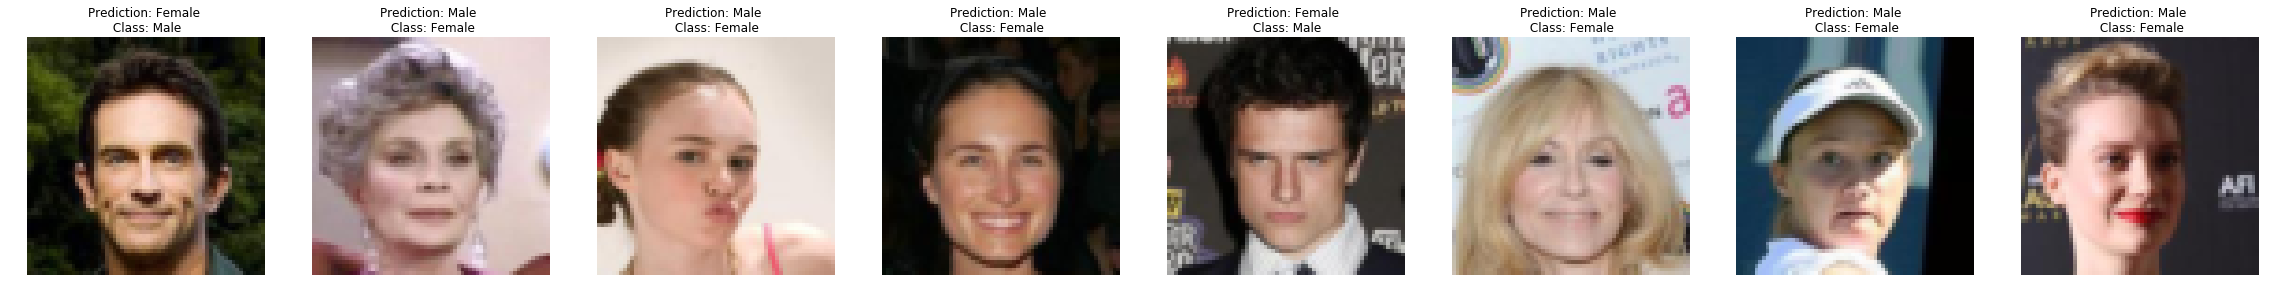

In [59]:
for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(test_x[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])] + " \n Class: " + classes[y_test[0,index]])

In the last [article](https://wp.me/p9ttN2-3c), we saw how to implement logistic regression as a neural network with single neuron. In this article, we will explore how we can use Multi layered Neural Networks(multiple layers of neurons) for classifying images. We will continue exploring the same problem from last [article](https://wp.me/p9ttN2-3c) i.e predicting the gender of the celebrity from the images. 

Let's quickly recap the structure of one neuron neural network. It has mainly two components, Z and A. Z is the linear combination of inputs and A is a non-linear transformation on Z. We used sigmoid function as the non-linear transformation.<br> <br>

<img src="images/part3/single_neuron.png" > <br>

The above image shows the layout of a single neuron. x1,x2,x3 are the inputs, z is the linear function of inputs with weights W(a vector) and a is the sigmoid function of z.

Training of single neuron neural network using gradient descent involves the following steps:

1) Initialize parameters i.e W and b

2) Forward Propagation: Calculate Z and A using the initialized parameters

3) Compute cost 

4) Backward propagation: Take gradient(derivative) of cost function with respect to W and b

5) Use the gradients to update the values of W and b

6) Repeat steps 2 to 5 for a fixed number of times


<img src="images/part3/Backward_propagation.png" >
<br>

Cost is given as :

\begin{equation*}
J(A,Y)= -{\frac{1} {m}} *( Ylog(A^T) + (1-Y)log((1-A)^T))
\end{equation*}

Derivatives used in backward propagation:

<br>
dA = ${\frac{\mathrm{d}J}{\mathrm{d}A}}$ = ${\frac{Y}{A}}+{\frac{1-Y}{1-A}}$ <br><br>
dZ = ${\frac{\mathrm{d}J}{\mathrm{d}Z}}$ =${\frac{\mathrm{d}J}{\mathrm{d}A}}.{\frac{\mathrm{d}A}{\mathrm{d}Z}}$= A-Y <br><br>
dW = ${\frac{\mathrm{d}J}{\mathrm{d}W}}$ = ${\frac{1}{m}}*(dZ.X^T)$ <br><br>
db  = ${\frac{\mathrm{d}J}{\mathrm{d}b}}$ = $mean(dZ)$<br><br>

where $X^T $ is the transpose of X and the function to calculate a is sigmoid.
<br>


<a name="Activation Functions "></a>
## Activation Functions<br>
Important point to remeber is that during forward propagation, we need to calculate z and a. Till now we have only used sigmoid as the function to calculate a. But we can also use other functions for a. These functions for a is called activation functions. Activation functions take z as the input and apply some form of non-linear function. Other commonly used activation functions are hyperbolic tangent, relu and leaky relu. <br>

Tanh(hyperbolic tangent) = $ \frac{e^z - e^{-z}}{ e^z + e^{-z }}$ <br><br>
Relu(Rectified Linear Units) = $max(0, z) $ <br><br>
Leaky relu = $ max(0.01z,z) $<br>

Cost will remain the same for any activation function. But in back propagation, dZ will vary for different activation functions. Rest of the derivatives will be the same. The reason for change is ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ will vary depending on the activation function.<br>

For sigmoid, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = $A(1-A)$ <br><br>
For tanh, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = 1-$A^2$ <br><br>
For relu, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = (0, if z < 0; 1, if z >= 0) <br><br>
For leaky relu, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = (0.01, if z < 0; 1, if z >= 0) <br><br>
<br>

From the above equations , now you can see for sigmoid function how ${\frac{\mathrm{d}J}{\mathrm{d}Z}}$ = dZ, became A-Y. 

<a name="Multi Layered neural nets "></a>
## Multi Layered Neural Networks<br>
Architecture of Multi Layered neural networks will look something like this.<br><br>

<img src="images/part3/MultiLayered.png" >
<br><br>

The inputs can be considered as input layers or layer 0. The last layer is the output layer. All the middle layers are called hidden layers i.e layer1,2 and 3. It's called hidden because not much is known about what is happening inside these layers. Many people call neural networks as black box algorithm for the same reason. Understanding the working of neurons in the hidden layers is still a research area. <br><br>

The calculations used for a single neuron can be expanded and generalized for multiple layers containing multiple neurons. Following figure shows the generalized calculations for each layer. It includes calculations for **forward propagation and backward propagation**.<br><br>

<img src="images/part3/LayerlCalc.png" >
<br><br>

The above quations, summarize the calculations for each layer in neural networks. The superscript [$l$] denotes the layer L. For every layer, after back propagation, weights and bias are updated as follows: <br><br>
$W=W- \alpha .dW$<br><br>
$b=b- \alpha .db$<br><br>
where $\alpha$ is the learning rate. <br><br>
The number of layers and number of neurons in each layer is a hyperparameter to tune. Generally, more number of layers you have, you will need less number of neurons in each layer. However, more number of layers will slow down the computations as well. 


<a name="Gender Prediction from Celebrity images"></a>
## Gender Prediction from Celebrity images<br>
Now let's implement multi layered neural nets to solve our problem of predicting the gender of the celebrity from the image. We will use leaky relu activation for the hidden layers, three of them, and sigmoid activation for the output layer. We will continue from where we stopped in the last [article](https://wp.me/p9ttN2-3c).

First let's define our activation functions, sigmoid and relu, which will take Z as the input. Sigmoid function = $\frac{1} {1+ e^{-z}} $ <br>
and leaky relu function =  $max(0.01*z, z) $ 
<br>where $Z=W.X + b$

In [77]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0.01*Z,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

Now let's define functions for backpropagation of activation function. i.e ${\frac{\mathrm{d}J}{\mathrm{d}Z}}={\frac{\mathrm{d}J}{\mathrm{d}A}}.{\frac{\mathrm{d}A}{\mathrm{d}Z}}=dZ$  for sigmoid and relu function. <br>
<br>For sigmoid, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = $A(1-A)$ <br><br>
For leaky relu, ${\frac{\mathrm{d}A}{\mathrm{d}Z}}$ = (0, if z < 0; 1, if z >= 0) <br><br>
We will pass dA and Z(stored as cache) as inputs to the function.

In [43]:


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z < 0] = dZ[Z < 0]*0.01
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


Now let us write a function to intialize the parameters, weights and bias for every layer. Unlike the single neuron case, we have to intialize weights for each layers separately. Weights for every layer will have the shape[no. of neurons in that layer, no. of neurons in the previous layer]. Bias for each layer will have the shape [no. of neurons in that layer,1]. <br><br>
Also, we will initialize weights from a standard normal distribution and multiply by  $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$. This is called he intialization. Generally this intialization works well. Biases can be intialized as zeros. 
<br><br>Random intialization of weights are better since it will allow different neurons to learn different aspects of the image. Also, the reason for drawing random numbers from a standard normal distribution(mean=0,std.dev=1) is that this will help in avoiding a problem called exploding or vanishing gradients. I am not going into the details but vanishing gradient in a nutshell means, during backpropagation of a deep neural network, the gradients of the intial layers become so small that they practically cease to update, SImiliarly, Exploding gradients means gradients of intial layers quickly reach a higher number or infinity stopping further learning. Vanishing gradients were one of the reasons why deep learning didn't become popular until 2006. I didn't mention earlier why we are using leaky relu activation function for the hidden layers. Leaky relus are better in handling vanishing or exploding gradients.  

In [28]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

Let's get to the linear forward function. This function will calculate the linear function $Z=W.X + b$ , for one layer (for all neurons in the layer) at a time. It will take A from previous layer and W(weight) and b(bias) of current layer as input.

In [79]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

Let's write a function to calculate the derivative values we need in each layer. We already wrote function to calculatedZ. In this function we will calculate dW,dB and dA_prev for one layer at a time.


<img src="images/part3/LayerlCalcBack.png" >

In [18]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

Let's define a common activation function for forward propagation and backward propagation, which will take activation as one of the input. Depending on the kind of value is passed for activation, the function will do the calculations for sigmoid or leaky relu.

In [19]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [20]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

Now let's define a function to create any number of layers of neurons from the functions we created. Since we have generalized calculations for each layer, we can add any number of layers. This function will do the forward propagation calcuations iteratively for each layer, starting from the input layer and ending with the output layer.

In [21]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2    # number of layers in the neural network. Every layer has a weight and bias, hence the length of the parameter will be double the layers.
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

Cost is calculated after the prediction from output layer is obtained. The formula for cost is same as in the last article(the same cost works for all binomial classification problems, although it can be generalized to multi-class classification problem).

In [22]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

Now let's define a function to do the backprop calculations for all the layers we created during forward propagation. Each layer calculation is done iteratively, starting from the output layer and ending with the input layer.

In [23]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

Let's write a function to update the parameters using the calculated gradients from backprop. This function can actually be combined in the backprop step. However, to enhance understanding let's write it separately.

In [24]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

Time to put everything together and create a single function for Multi layered neural network. Just to remind, the steps involved are: <br>
1) Initialize parameters i.e W and b<br>
2) Forward Propagation: Calculate Z and A using the initialized parameters<br>
3) Compute cost <br>
4) Backward propagation: Take gradient(derivative) of cost function with respect to W and b<br>
5) Use the gradients to update the values of W and b<br>
6) Repeat steps 2 to 5 for a fixed number of times(num_iterations)<br>

In [82]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Now let us design the number of layers an neurons we need for our model. The size of the input is 12288(flattened pixel size for each image) and size of output layer is 1. We can decide on any number of input layers by adding more values in between. The number in between decides the number of neurons in that layer. 

In [ ]:
### CONSTANTS ###
layers_dims = [12288, 20, 7,5, 1] #  5-layer model, 3 hidden layers, 1 input and 1 output layer

Let us run the model on our training dataset.

Cost after iteration 0: 1.070965
Cost after iteration 100: 0.562904
Cost after iteration 200: 0.506057
Cost after iteration 300: 0.471016
Cost after iteration 400: 0.438274
Cost after iteration 500: 0.415518
Cost after iteration 600: 0.402530
Cost after iteration 700: 0.389101
Cost after iteration 800: 0.379235
Cost after iteration 900: 0.373636
Cost after iteration 1000: 0.364686
Cost after iteration 1100: 0.357966
Cost after iteration 1200: 0.357162
Cost after iteration 1300: 0.349248
Cost after iteration 1400: 0.347425
Cost after iteration 1500: 0.341249
Cost after iteration 1600: 0.336788
Cost after iteration 1700: 0.334838
Cost after iteration 1800: 0.329172
Cost after iteration 1900: 0.327770


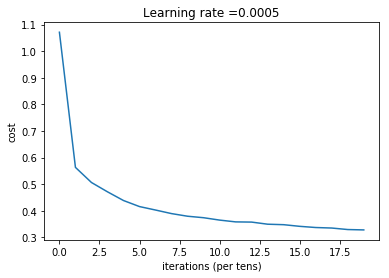

In [89]:
parameters = L_layer_model(train_x, y_train, layers_dims,learning_rate = 0.0005, num_iterations = 2000, print_cost = True)

Now let's define a predict function which will use the trained model parameters to predict the gender of input images. Probabilities above or equal to 0.5 are considered as females and probabilities below 0.5 are considered as males.

In [96]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    p=np.round(probas)
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

Let's check the accuracy of the algorithm on training and testing data.

In [101]:
print("Train Accuracy")
pred_train = predict(train_x, y_train, parameters)
print("Test Accuracy")
pred_test = predict(test_x, y_test, parameters)

Train Accuracy
Accuracy: 0.975
Test Accuracy
Accuracy: 0.75


With a single neuron, we got test accuracy of 65%. With a multilayered model, we improved our accurcy to 75%. Not bad!

Now let us define a function to look at the misclassified images.

In [94]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='sinc')
        plt.axis('off')
        plt.rc('font', size=20)
        plt.title("Prediction: " + classes[int(p[0,index])] + " \n Class: " + classes[y[0,index]])

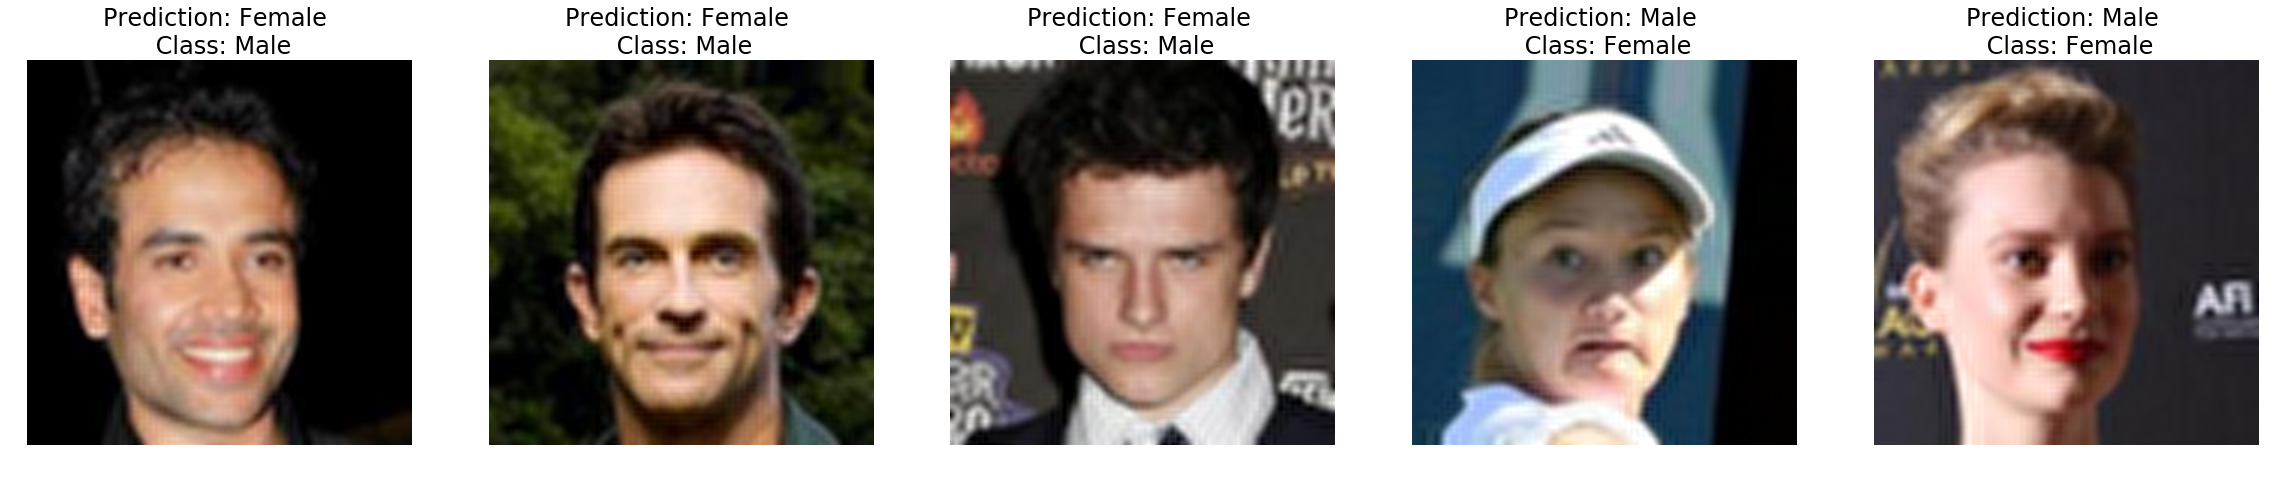

In [95]:
print_mislabeled_images(classes, test_x, y_test, pred_test)

One of the biggest question now is can we improve the accuracy of the model. We probably can improve a bit more by further tuning the learning rate, number of layers and neurons and even trying out different kinds of activation functions. As you know by now, there are a lot of hyoerparameters which has to be tuned for the neural networks. That is one of the reason why it is very difficult to train a multi layered neural network or deeplearning model.<br><br> One other thing we notice is, there is a big difference between training accuracy and testing accuracy. This is probably a sign of overfitting. There are different ways of reducing overfitting, like regularization and dropout. I will discuss that in the next article.<br><br>